In [118]:
from scipy import signal
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
matplotlib.use('TkAgg')

In [119]:
#load csv file:
df = pd.read_csv('log_refactored_correction_factor.csv', na_values=['no info', '.'], delimiter=',')
df_indexed = df.reset_index(drop=False)

In [120]:
#fill feature variables:
index = df_indexed['index']
delta = df_indexed['Delta']
volume = df_indexed['Blood Accumulated']

In [121]:
#Create an order 3 lowpass butterworth filter:
b, a = signal.butter(10, 0.1, btype='low')

In [122]:
#Apply the filter to xn. Use lfilter_zi to choose the initial condition of the filter:
zi = signal.lfilter_zi(b, a)
z_d, _ = signal.lfilter(b, a, delta, zi=zi*delta[0])
z_v, _ = signal.lfilter(b, a, delta, zi=zi*volume[0])

#Apply the filter again, to have a result filtered at an order the same as filtfilt:
zd2, _ = signal.lfilter(b, a, z_d, zi=zi*z_d[0])
zv2, _ = signal.lfilter(b, a, z_v, zi=zi*z_v[0])

#Use filtfilt to apply the filter:
y_d = signal.filtfilt(b, a, delta)
y_v = signal.filtfilt(b, a, volume)

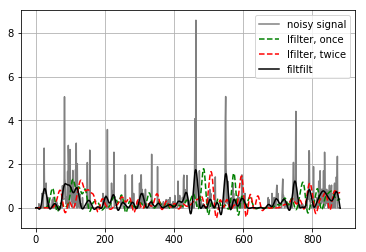

In [129]:
#Plot the original signal and the various filtered versions:
plt.figure
plt.plot(index, delta, 'grey')
plt.plot(index, z_d, 'g--', index, zd2, 'r--', index, y_d, 'k')
plt.legend(('noisy signal', 'lfilter, once', 'lfilter, twice', 'filtfilt'), loc='best')
plt.grid(True)
plt.show()

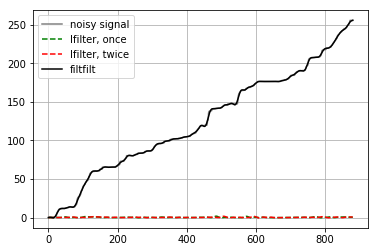

In [132]:
#this plot shows that applying the lfilter has no effect on the signal
plt.figure
plt.plot(index, volume, 'grey')
plt.plot(index, z_v, 'g--', index, zv2, 'r--', index, y_v, 'k')
plt.legend(('noisy signal', 'lfilter, once', 'lfilter, twice', 'filtfilt'), loc='best')
plt.grid(True)
plt.show()

In [ ]:
##############################################

In [82]:
window = [5, 50, 100]
w1, w2, w3 = window
delta_filtered_w1, delta_filtered_w2, delta_filtered_w3 = [], [], []

def leakyint(x, ym1, a=0.9):
    return ym1*a + x

def softleakyint(past_x, ym1, bcoeffs, acoeff=0.9):
    return np.dot(past_x, bcoeffs) + ym1*acoeff

In [4]:
prev_y = 0
outsig = []
insig = [0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for x in insig:
    y = leakyint(x, prev_y, 0.95)
    prev_y = y
    outsig.append(y)    

In [5]:
prev_y = 0
outsig = []
insig = [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
bcoeffs = np.array([0.2, 0.4, 0.7, 0.9, 1]) # [::-1]
bcoeffs = bcoeffs / np.linalg.norm(bcoeffs)
M = bcoeffs.shape[0]
for i, x in enumerate(insig):
    if i>M: 
        past_x = insig[i-M:i]
    else: 
        past_x = np.hstack((np.zeros(M-i), insig[:i]))
    y = softleakyint(past_x, prev_y, bcoeffs, 0.5)
    prev_y = y
    outsig.append(y)    

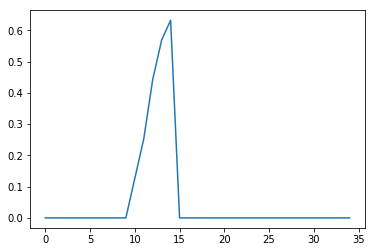

In [6]:
plt.plot(signal.convolve(insig, bcoeffs))

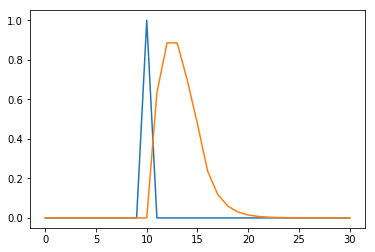

In [7]:
plt.plot(np.array(insig))
plt.plot(outsig)

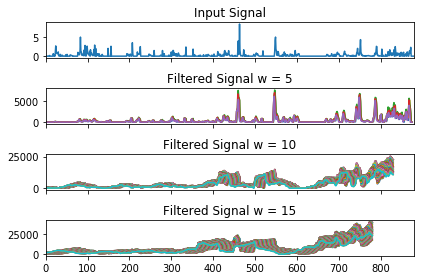

<Figure size 432x288 with 0 Axes>

In [10]:
fig, (ax_win, ax_filt_1, ax_filt_2, ax_filt_3) = plt.subplots(4, 1, sharex=True)
#ax_orig.plot(index)
#ax_orig.set_title('Original Pulse (1 takt per second)')
#ax_orig.margins(0, 0.05)
ax_win.plot(delta)
ax_win.set_title('Input Signal')
ax_win.margins(0, 0.05)
ax_filt_1.plot(delta_filtered_w1)
ax_filt_1.set_title('Filtered Signal w = 5')
ax_filt_1.margins(0, 0.05)
ax_filt_2.plot(delta_filtered_w2)
ax_filt_2.set_title('Filtered Signal w = 10')
ax_filt_2.margins(0, 0.05)
ax_filt_3.plot(delta_filtered_w3)
ax_filt_3.set_title('Filtered Signal w = 15')
ax_filt_3.margins(0, 0.05)
fig.tight_layout()
fig = plt.figure(constrained_layout=True)
#fig.show()

In [40]:
b, a = signal.butter(2, 0.5)


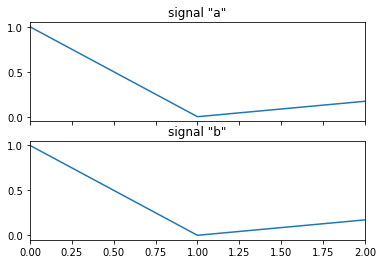

In [41]:
fig, (ax_a, ax_b) = plt.subplots(2, 1, sharex=True)
ax_a.plot(a)
ax_a.set_title('signal "a"')
ax_a.margins(0, 0.05)
ax_b.plot(a)
ax_b.set_title('signal "b"')
ax_b.margins(0, 0.05)

In [ ]:
index = df_indexed['index']
delta = df_indexed['Delta']
volume = df_indexed['Blood Accumulated']

window = [5,50,100]
w1, w2, w3 = window[0], window[1], window[2]
delta_filtered_w1, delta_filtered_w2, delta_filtered_w3 = [], [], []

for i in range(index.size):
    if i < w1:
        continue
    elif i < w2: 
        filtered1 = signal.convolve(index[i-w1:i], delta[i-w1:i], mode='same')
        delta_filtered_w1.append(filtered1)
    elif i < w3:
        filtered1 = signal.convolve(index[i-w1:i], delta[i-w1:i], mode='same')
        delta_filtered_w1.append(filtered1)

        filtered2 = signal.convolve(index[i-w2:i], delta[i-w2:i], mode='same')
        delta_filtered_w2.append(filtered2)
    else:
        filtered1 = signal.convolve(index[i-w1:i], delta[i-w1:i], mode='same')
        delta_filtered_w1.append(filtered1)

        filtered2 = signal.convolve(index[i-w2:i], delta[i-w2:i], mode='same')
        delta_filtered_w2.append(filtered2)
        
        filtered3 = signal.convolve(index[i-w3:i], delta[i-w3:i], mode='same')
        delta_filtered_w3.append(filtered3)

            